# Data Science Challenge - Part-II
## Notebook -II by Debisree Ray


### 1. The Data:

The data contains the user action logs from a popular online retail website, captured for 14 days between 2016-06-01 to 2016-06-14 (both days inclusive). Columns in the dataset are follows:

* **userid:** unique identifier of user who visited the website
* **offerid:** unique identifier of the offer shown
* **countrycode:** two-character country code
* **category:** category ID of the offer
* **merchant:** unique identifier of the merchant who has published the offer
* **utcdate:** timestamp of the user action
* **rating:** if the user has clicked the offer or not (1:clicked, 0: not clicked, only viewed)


### 2. Questions:

1. Think about a situation, where a mobile advertisement company has this historical data. Each impression (placing advertisement) cost the advertisement company 1 cent, and each click cost the advertisement company 1USD,(1USD=100 cents). Each {userid, offerid, merchantid} should have 10 impressions. It has been given by merchants (the companies who have contracted with the advertisement company to run the advertisement campaign) that for each impression the ROI (return on investment) for the merchants is 10 cents and for each click the ROI for the merchant is 10USD. The advertisement company has 10,000 USD to run the advertisement campaign in the next 7 days. Based on the above historical dataset could you identify the {userid, offerid, merchantid} combination (or combinations) that the advertisement agency should target in this campaign? Please clearly narrate your intuition and process behind choosing the combinations.

2. Develop at least two models which will predict whether the advertisement will be clicked or not. (***rating*** is the dependent variable). Provide detailed reports behind choosing different parameters in building your models by comments in your code. Produce the relevant validation metrics for training and testing the data.

### 3. Data wrangling:

* To start, we need to first import all the necessary modules and libraries.
* Read the train/test data set into the **'Pandas dataframe'**.
* There are 7 columns and 15844717 rows in the training data.
* There are 7 columns and 1919561 rows in the test data.
* The column **'countrycode' = 'de'** for the entire dataset. So, We can get rid of the column, as that has nothing to do with the modelling.
* There is no missing value in the columns.
* The target variable is **'rating'**, which can take the value either 1/0 (depending on whether the link has been clicked or not.)

In [2]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

## Import progress bar for longer running model training:

import time
from tqdm import tnrange, tqdm
from time import sleep

In [3]:
#Read the Train set:
df_train = pd.read_csv('train_de.csv', sep='\t', encoding="latin1")
df_train.head()

,userid,offerid,countrycode,category,merchant,utcdate,rating
0,fa937b779184527f12e2d71c711e6411236d1ab59f8597...,c5f63750c2b5b0166e55511ee878b7a3,de,100020213,f3c93baa0cf4430849611cedb3a40ec4094d1d370be841...,2016-06-14 17:28:47.0,0
1,f6c8958b9bc2d6033ff4c1cc0a03e9ab96df4bcc528913...,19754ec121b3a99fff3967646942de67,de,100020213,21a509189fb0875c3732590121ff3fc86da770b0628c18...,2016-06-14 17:28:48.0,0
2,02fe7ccf1de19a387afc8a11d08852ffd2b4dabaed4e2d...,5ac4398e4d8ad4167a57b43e9c724b18,de,125801,b042951fdb45ddef8ba6075ced0e5885bc2fa4c4470bf7...,2016-06-14 17:28:50.0,0
3,9de5c06d0a16256b13b8e7cdc50bf203ecef533eb5cbe1...,be83df9772ec47fd210b28091138ff11,de,125801,4740b6c83b6e12e423297493f234323ffd1c991f3d4496...,2016-06-14 17:29:19.0,0
4,8d26ade603ea5473c3844aebfcd9e96e6adc8ff411576e...,3735290a415dc236bacd7ed3aa03b2d5,de,125801,8bf8f87492a799528235c04bb18ff2d12db5058ff6e9a0...,2016-06-14 17:29:31.0,0


In [4]:
#Test set:

df_test = pd.read_csv('test_de.csv', sep='\t', encoding="latin1")
df_test.head()

,userid,offerid,countrycode,category,merchant,utcdate,rating
0,d581f697c19367969d3bff0ddd7491816969433ace2a1a...,be83df9772ec47fd210b28091138ff11,de,125801,4740b6c83b6e12e423297493f234323ffd1c991f3d4496...,2016-06-15 09:43:32.0,0
1,b6208e4f5c0ea1a5d0fe97e436d51fb5b8abf6f180ac37...,b75d6ee742849a6224bf49f55c56cb0f,de,100020213,26467f203f42913b6bc575fd4adc89ad66c5db082c8ab9...,2016-06-15 09:43:36.0,0
2,b4dfe41dcb584aee3f4b7c0364fb71816a5f8266f9b225...,3ba463bbdb2e24eac638c0d3d92776c2,de,100020213,10698b6475abd54c5c6d1724d6f51cb795234c23a23daf...,2016-06-15 09:44:02.0,0
3,d581f697c19367969d3bff0ddd7491816969433ace2a1a...,be83df9772ec47fd210b28091138ff11,de,125801,4740b6c83b6e12e423297493f234323ffd1c991f3d4496...,2016-06-15 09:44:04.0,0
4,351163eb97a830c6cb9b101f3f4ee1d8e87cee0c76a675...,b75d6ee742849a6224bf49f55c56cb0f,de,100020213,26467f203f42913b6bc575fd4adc89ad66c5db082c8ab9...,2016-06-15 09:44:12.0,0


In [5]:
df_train.columns

Index(['userid', 'offerid', 'countrycode', 'category', 'merchant', 'utcdate',
       'rating'],
      dtype='object')

In [6]:
df_train.shape

(15844717, 7)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15844717 entries, 0 to 15844716
Data columns (total 7 columns):
userid         object
offerid        object
countrycode    object
category       int64
merchant       object
utcdate        object
rating         int64
dtypes: int64(2), object(5)
memory usage: 846.2+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919561 entries, 0 to 1919560
Data columns (total 7 columns):
userid         object
offerid        object
countrycode    object
category       int64
merchant       object
utcdate        object
rating         int64
dtypes: int64(2), object(5)
memory usage: 102.5+ MB


In [9]:
df_train['countrycode'].value_counts()

de    15844717
Name: countrycode, dtype: int64

In [10]:
df_test['countrycode'].value_counts()

de    1919561
Name: countrycode, dtype: int64

* The entire data belongs to the **'countrycode'= 'de'**. So, this column has no significance and can be dropped.

In [11]:
df_train=df_train.drop(['countrycode'], axis=1)
df_test=df_test.drop(['countrycode'], axis=1)
df_train.head()

,userid,offerid,category,merchant,utcdate,rating
0,fa937b779184527f12e2d71c711e6411236d1ab59f8597...,c5f63750c2b5b0166e55511ee878b7a3,100020213,f3c93baa0cf4430849611cedb3a40ec4094d1d370be841...,2016-06-14 17:28:47.0,0
1,f6c8958b9bc2d6033ff4c1cc0a03e9ab96df4bcc528913...,19754ec121b3a99fff3967646942de67,100020213,21a509189fb0875c3732590121ff3fc86da770b0628c18...,2016-06-14 17:28:48.0,0
2,02fe7ccf1de19a387afc8a11d08852ffd2b4dabaed4e2d...,5ac4398e4d8ad4167a57b43e9c724b18,125801,b042951fdb45ddef8ba6075ced0e5885bc2fa4c4470bf7...,2016-06-14 17:28:50.0,0
3,9de5c06d0a16256b13b8e7cdc50bf203ecef533eb5cbe1...,be83df9772ec47fd210b28091138ff11,125801,4740b6c83b6e12e423297493f234323ffd1c991f3d4496...,2016-06-14 17:29:19.0,0
4,8d26ade603ea5473c3844aebfcd9e96e6adc8ff411576e...,3735290a415dc236bacd7ed3aa03b2d5,125801,8bf8f87492a799528235c04bb18ff2d12db5058ff6e9a0...,2016-06-14 17:29:31.0,0


In [12]:
# Let's divide the dataframe (from the training) into two groups - clicked/not clicked:

df_zero=  df_train[df_train['rating'] == 0]
df_one= df_train[df_train['rating']>0]

### 4. Exploratory Data Analysis (EDA):

* To start the EDA, here every different features have been studied and visually displayed against the target variable, so as to infer any relationship between them.

### 4.1 Userid:

* This is the unique identifier of user who visited the website.
* Total 291485 users.
* There are some users who are frequent users (visited the website at least twice).
* There are some users who are actually one-timers (did not return to the website)
* 48.9% of the total users are non-returning, who clicked.
* 0.5% of the total users are non-returning, who has not clicked.
* 28.9% of the total users are returning, who has not clicked.
* 21.7% of the total users are returning, who clicked.


In [13]:
#User-ID:

user= df_train['userid'].value_counts()
len(user)

291485

In [14]:
#User-ID who clicked/ and not clicked:

user_one= df_one['userid'].value_counts()
user_zero = df_zero['userid'].value_counts()

In [15]:
#Let's see how many users (who clicked) are returning:

not_frequent_one= np.count_nonzero(user_one.values == 1)
is_frequent_one = np.count_nonzero(user_one.values >1)

#Let's see how many users (who has not clicked) are returning:

not_frequent_zero= np.count_nonzero(user_zero.values == 1)
is_frequent_zero = np.count_nonzero(user_zero.values >1)

print(not_frequent_one)
print(is_frequent_one)

print(not_frequent_zero)
print(is_frequent_zero)

183106
81272
1689
108084


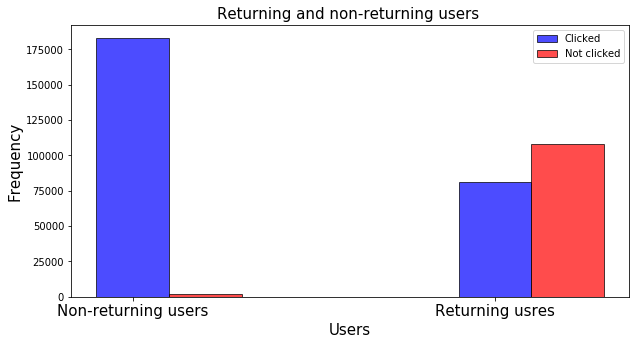

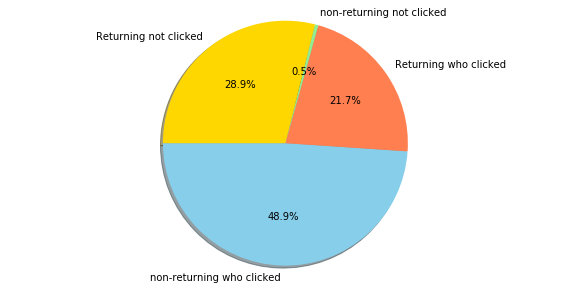

In [92]:
#Visually:

plt.figure(figsize=(10,5))
freq_one = [not_frequent_one, is_frequent_one]
freq_zero = [not_frequent_zero, is_frequent_zero]

index=[0,1]
index1=[0.201,1.201]

#index= ['non_returning','returning']
_=plt.bar(index,freq_one,color='b', alpha=0.7,width=0.2,edgecolor='k', label='Clicked')
_=plt.bar(index1,freq_zero,color='r',alpha=0.7,width=0.2,edgecolor='k', label='Not clicked')

plt.title('Returning and non-returning users ',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Users', fontsize=15)
plt.xticks([0, 1], ['Non-returning users','Returning usres'],fontsize=15)
plt.legend()
plt.savefig("1.png")
plt.show()


#Pieplot:

plt.figure(figsize=(10,5))

labels = 'non-returning who clicked','Returning who clicked','non-returning not clicked','Returning not clicked'
sizes = [183106,81272,1689,108084]
colors = ['skyblue','coral','lightgreen','gold']
explode = (0.0,0.0,0.0,0.0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("2.png")
plt.show()

### 4.2 Offerid:

* This is the unique identifier of the offer shown.
* There are 2158859 offer-IDs listed.

In [17]:
off=df_train['offerid'].value_counts()
len(off)

2158859

In [48]:
#Different offer(IDs) (clicked/not clicked):

off_one=df_one['offerid'].value_counts()
off_zero= df_zero['offerid'].value_counts()

#print(len(off_one))
#print(len(off_zero))

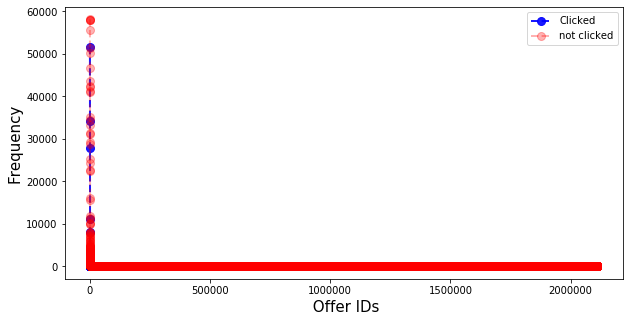

In [93]:
#Visually:

plt.figure(figsize=(10,5))
_=plt.plot(off_one.values, color='b', marker='o', linestyle='dashed',alpha=0.9,linewidth=2, markersize=8, label='Clicked')
_=plt.plot(off_zero.values, color='r', marker='o', linestyle='dashed',alpha=0.3,linewidth=2, markersize=8,label='not clicked')
plt.xlabel(' Offer IDs', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.savefig("3.png")
plt.show()

### 4.3 category :

* These are the different categiroes (IDs) for different offer IDs
* 271 unique different offer categories are there.
* Maximum frequency for an offer category = 934537
* Minimum frequency for an offer category = 15

In [20]:
cat=df_train['category'].value_counts()
len(cat.index)

271

In [21]:
#Different categories(IDs) of the offers (clicked/not clicked):

cat_one=df_one['category'].value_counts()
cat_zero= df_zero['category'].value_counts()

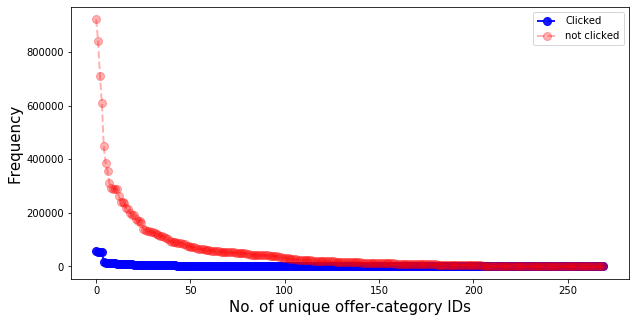

In [94]:
#Visually:

plt.figure(figsize=(10,5))
_=plt.plot(cat_one.values, color='b', marker='o', linestyle='dashed',alpha=0.9,linewidth=2, markersize=8, label='Clicked')
_=plt.plot(cat_zero.values, color='r', marker='o', linestyle='dashed',alpha=0.3,linewidth=2, markersize=8,label='not clicked')
plt.xlabel('No. of unique offer-category IDs', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.savefig("4.png")
plt.show()

### 4.4 merchantid:

* unique identifier of the merchant who has published the offer.
* 703 different merchants are there.

In [23]:
#Merchant-ID:
mer=df_train['merchant'].value_counts()
len(mer.index)

703

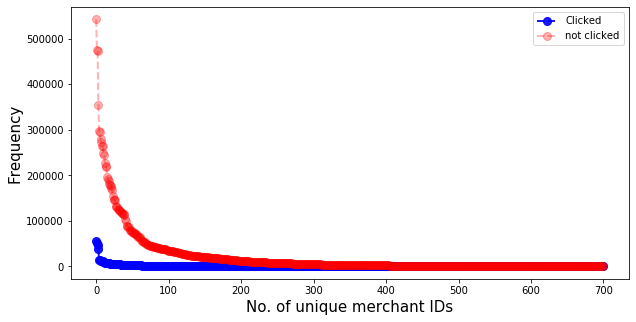

In [95]:
#Merchant ID (clicked/not clicked):


mer_one=df_one['merchant'].value_counts()
mer_zero=df_zero['merchant'].value_counts()


#Visually:

plt.figure(figsize=(10,5))
_=plt.plot(mer_one.values, color='b', marker='o', linestyle='dashed',alpha=0.9,linewidth=2, markersize=8, label='Clicked')
_=plt.plot(mer_zero.values, color='r', marker='o', linestyle='dashed',alpha=0.3,linewidth=2, markersize=8,label='not clicked')
plt.xlabel('No. of unique merchant IDs', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.savefig("5.png")
plt.show()

### 4.5 utcdate:

* This is the timestamp of the user action.
* Here we have splitted the timestamp into further details.
* The additional columns created are: 
   * **'dayofweek'**: Here we have plotted the user activities over the days of the week. And on the same graph, we have shown the clicked ones. We can see that the maximum activities are on Fridays. However, 30.5% of the clicks are done on the Tuesdays.
   * **'date'**: Here we have plotted the activities over the dates. And on the same graph plotted the clicked ones. We see that the maximum activity is on 12th. However maximum clicks are on 14th.
   * **'Hour'**: Here we have plotted the user activities over the hours of days. In two different graphs we have shown the clicks/ not click activity rates. Clearly, the click rates are maximum at the 17th hour.

In [25]:
#convert utcdate to date-time object:
#Note: when we try to convert NaN to date-time, it gets converted to NaT(Not a timestamp):

import datetime
df_one['utcdate'] = pd.to_datetime(df_one['utcdate'])
df_zero['utcdate'] = pd.to_datetime(df_zero['utcdate'])
df_train['utcdate'] = pd.to_datetime(df_train['utcdate'])
df_test['utcdate'] = pd.to_datetime(df_test['utcdate'])

#Split the timestamp into further details: -  day of week, date, hour:


#One-zero dataset for plotting:

df_one['dayofweek_one'] = pd.to_datetime(df_one['utcdate'],errors= 'coerce').dt.dayofweek
df_one['date_one'] = pd.to_datetime(df_one['utcdate'],errors= 'coerce').dt.day
df_one['hour_one'] = pd.to_datetime(df_one['utcdate'],errors ='coerce').dt.hour

df_zero['dayofweek_zero'] = pd.to_datetime(df_zero['utcdate'],errors= 'coerce').dt.dayofweek
df_zero['date_zero'] = pd.to_datetime(df_zero['utcdate'],errors= 'coerce').dt.day
df_zero['hour_zero'] = pd.to_datetime(df_zero['utcdate'],errors ='coerce').dt.hour

#Original train-test dataset:

df_train['dayofweek'] = pd.to_datetime(df_train['utcdate'],errors= 'coerce').dt.dayofweek
df_train['date'] = pd.to_datetime(df_train['utcdate'],errors= 'coerce').dt.day
df_train['hour'] = pd.to_datetime(df_train['utcdate'],errors ='coerce').dt.hour

df_test['dayofweek'] = pd.to_datetime(df_test['utcdate'],errors= 'coerce').dt.dayofweek
df_test['date'] = pd.to_datetime(df_test['utcdate'],errors= 'coerce').dt.day
df_test['hour'] = pd.to_datetime(df_test['utcdate'],errors ='coerce').dt.hour

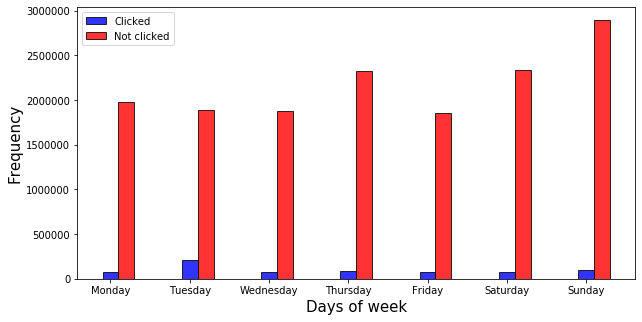

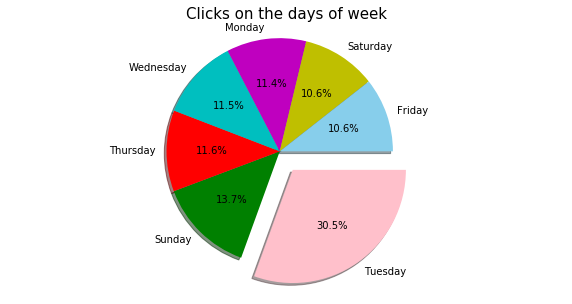

In [96]:
#plot:

day_one=df_one['dayofweek_one'].value_counts()
day_zero= df_zero['dayofweek_zero'].value_counts()

#Visually days over the week:

plt.figure(figsize=(10, 5))
_=plt.bar(day_one.index,day_one.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='Clicked')
_=plt.bar(day_zero.index+0.2,day_zero.values,width=0.2,color='r',edgecolor='k',alpha=0.8,label='Not clicked')
plt.xlabel('Days of week',fontsize=15)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.ylabel('Frequency',fontsize=15)
#plt.title('Distribution of click-through over the days of weeks',fontsize=15)
plt.legend()
plt.savefig("6.png")
plt.show()

#Pieplot to show distribution of clicks:

plt.figure(figsize=(10,5))
values = day_one.values
labels= ['Tuesday','Sunday','Thursday','Wednesday','Monday','Saturday','Friday']
colors = ['pink', 'g', 'r', 'c', 'm', 'y','skyblue']
#labels = ['Friday', 'Sunday', 'Monday', 'Saturday', 'Thursday', 'Wednesday','Tuesday']
#plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
explode = (0.2, 0, 0, 0, 0, 0,0)
plt.pie(values, colors=colors, labels= labels,explode=explode,counterclock=False, autopct='%1.1f%%',shadow=True)
plt.title('Clicks on the days of week',fontsize=15)
plt.axis('equal')
plt.savefig("7.png")
plt.show()

#day_one.index

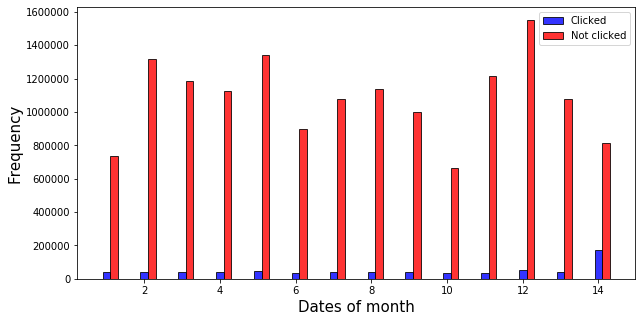

In [97]:
#plot:

date_one=df_one['date_one'].value_counts()
date_zero= df_zero['date_zero'].value_counts()

#Visually dates over the month (we have only 14 days of data):

plt.figure(figsize=(10, 5))
_=plt.bar(date_one.index,date_one.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='Clicked')
_=plt.bar(date_zero.index+0.2,date_zero.values,width=0.2,color='r',edgecolor='k',alpha=0.8,label='Not clicked')
plt.xlabel('Dates of month',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Distribution of click-through over the days of weeks',fontsize=15)
plt.legend()
plt.savefig("8.png")
plt.show()

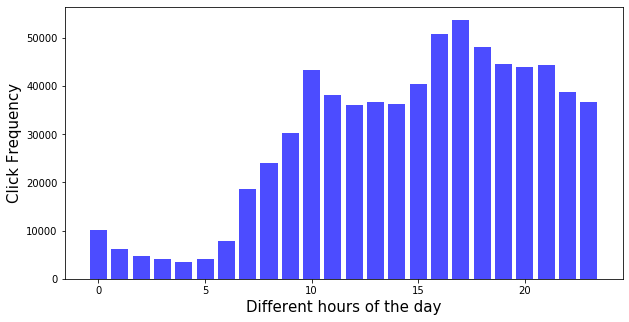

In [98]:
#plot:

hour_one=df_one['hour_one'].value_counts()
hour_zero= df_zero['hour_zero'].value_counts()

#Visually over the time of the days:

plt.figure(figsize=(10, 5))
_=plt.bar(hour_one.index,hour_one.values,alpha=0.7, color='b')
plt.xlabel('Different hours of the day',fontsize=15)
plt.ylabel('Click Frequency',fontsize=15)
#plt.title('Histogram showing the click-through over the times of the days',fontsize=15)
plt.savefig("9.png")
plt.show()

In [29]:
df_one['hour_one'].dtype

dtype('int64')

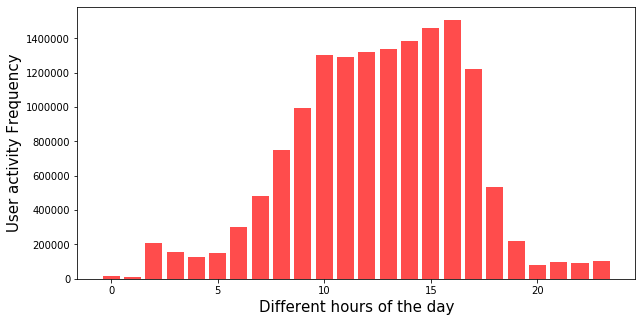

In [99]:
#Visually the clicks over the time of the days:

plt.figure(figsize=(10, 5))
_=plt.bar(hour_zero.index,hour_zero.values, alpha=0.7, color='r')
plt.xlabel('Different hours of the day',fontsize=15)
plt.ylabel('User activity Frequency',fontsize=15)
#plt.title('Histogram showing the not-click-through over the hours of the days',fontsize=15)
plt.savefig("10.png")
plt.show()

### 4.6 rating:

* This column tells, if the user has clicked the offer or not (1:clicked, 0: not clicked, only viewed)
* This is the target variable.
* we see theat, there is **major class imbalance** in the data. Very few click-through (<5%), as compared to the large amount of non-click-through.
* 95.5% of the cases, the click-through =0 (i.e. not clicked)
* Only 4.5% of the cases, the click-through =1 (clicked)

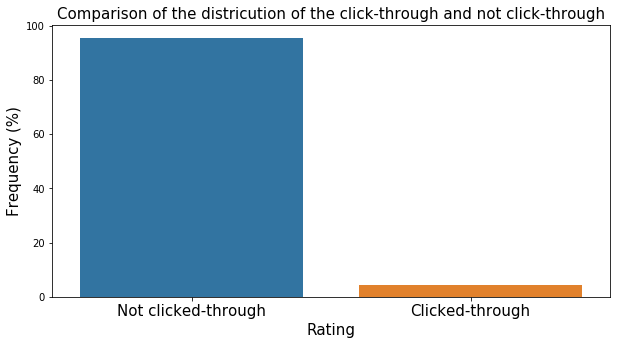

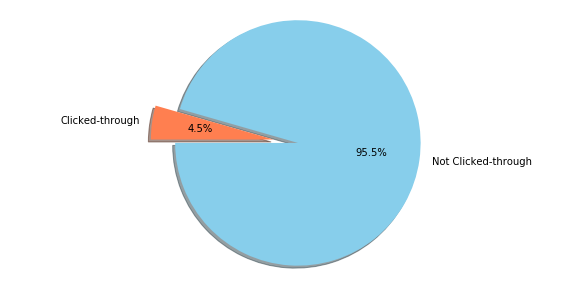

In [100]:
rate=df_train['rating'].value_counts(normalize=True)

#Visually:
plt.figure(figsize=(10,5))
_=sns.barplot(rate.index,rate.values*100)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frequency (%)',fontsize=15)
plt.xticks([1, 0], ['Clicked-through','Not clicked-through'],fontsize=15)
plt.title('Comparison of the districution of the click-through and not click-through', fontsize=15)
plt.savefig("11.png")
plt.show()

#Pieplot:

plt.figure(figsize=(10,5))

#labels = rate.index
labels = 'Not Clicked-through','Clicked-through'
sizes = rate.values
colors = ['skyblue','coral']
explode = (0.0,0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.savefig("12.png")
plt.show()

### 5. Some additional features through feature engineering:

* The three unique user IDs cannot be used as a feature in the ML models directly.
* So, I am creating additional columns to gather the total click=1 information, corresponding each userID/offer ID/merchant ID.

In [32]:
# Group rating by user id and calculate the sum (total ratings):


r = df_train.groupby('userid')['rating'].agg(['sum'])
r.columns = ['user_rating_sum']

# Merge with the train dataframe:

df_train = df_train.merge(r, left_on = 'userid', right_index=True, how = 'left')

#df_train.head()


In [33]:
#Same in the test-set:
# Group rating by user id and calculate the sum:


r = df_test.groupby('userid')['rating'].agg(['sum'])
r.columns = ['user_rating_sum']

# Merge with the train dataframe:

df_test = df_test.merge(r, left_on = 'userid', right_index=True, how = 'left')

#df_test.head()

In [34]:
# Group rating by merchant id and calculate the sum of ratings:


mer_r = df_train.groupby('merchant')['rating'].agg(['sum'])
mer_r.columns = ['mer_rating_sum']

#mer_r.head()

# Merge with the train dataframe:

df_train = df_train.merge(mer_r, left_on = 'merchant', right_index=True, how = 'left')

#df_train.head()

In [35]:
#Test set:
# Group rating by merchant id and calculate the sum of ratings:


mer_r = df_test.groupby('merchant')['rating'].agg(['sum'])
mer_r.columns = ['mer_rating_sum']

#mer_r.head()

# Merge with the train dataframe:

df_test = df_test.merge(mer_r, left_on = 'merchant', right_index=True, how = 'left')

#df_test.head()

In [36]:
# Group rating by offer id and calculate the sum of ratings:


off_r = df_train.groupby('offerid')['rating'].agg(['sum'])
off_r.columns = ['off_rating_sum']


# Merge with the train dataframe:

df_train = df_train.merge(off_r, left_on = 'offerid', right_index=True, how = 'left')

#df_train.head()

In [37]:
#Test set:
# Group rating by offer id and calculate the sum of ratings:


off_r = df_test.groupby('offerid')['rating'].agg(['sum'])
off_r.columns = ['off_rating_sum']


# Merge with the train dataframe:

df_test = df_test.merge(off_r, left_on = 'offerid', right_index=True, how = 'left')

#df_test.head()

In [38]:
print(df_train.columns)
print(df_test.columns)

Index(['userid', 'offerid', 'category', 'merchant', 'utcdate', 'rating',
       'dayofweek', 'date', 'hour', 'user_rating_sum', 'mer_rating_sum',
       'off_rating_sum'],
      dtype='object')
Index(['userid', 'offerid', 'category', 'merchant', 'utcdate', 'rating',
       'dayofweek', 'date', 'hour', 'user_rating_sum', 'mer_rating_sum',
       'off_rating_sum'],
      dtype='object')


### 6.  Prepare the data for applying ML (Classification Algorithms):

As we have discussed earlier, the dataset has huge class imbalance. So, there are different ways to tackle class imbalance: which are as follows:

* **Resampling: oversample minority class:**  Good when you don't have a ton of data
* **Resampling: undersample majority class:** Good when you have huge data
* **Generate synthetic samples:** SMOTE (Synthetic minority oversampling technique)
* **Class_weight:** This is one of the simple way to address the problem. The idea is to provide a weight for each class which places more emphasis on the minority classes such that the end result is a classifier which can learn equally from both the classes.

Ref: https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

In [39]:
print(df_test.dtypes)

print(df_train.dtypes)

userid                     object
offerid                    object
category                    int64
merchant                   object
utcdate            datetime64[ns]
rating                      int64
dayofweek                   int64
date                        int64
hour                        int64
user_rating_sum             int64
mer_rating_sum              int64
off_rating_sum              int64
dtype: object
userid                     object
offerid                    object
category                    int64
merchant                   object
utcdate            datetime64[ns]
rating                      int64
dayofweek                   int64
date                        int64
hour                        int64
user_rating_sum             int64
mer_rating_sum              int64
off_rating_sum              int64
dtype: object


In [40]:
#Trainig set:

y_train = df_train.rating

features_cols= ['category', 'dayofweek', 'date', 'hour','user_rating_sum','mer_rating_sum','off_rating_sum']
features = df_train[features_cols]

#features:
X_train= features

### 7. Modeling:

As this is a classification problem. We will be applying i) **Random Forest** ii) **Gradient Boost** and iii) **Logistic Regression** and compare their performances.

To trial with the models and find the best parameters, I will work with a random subset of the data. The original dataset(s) being too large, the computation is too time consuming, or actually not possible. (Given my computation power is very limited). 

The subset will be the represntative of the original dataset.


### 7.1 Low volume dataset(s) : Random subsets:

* Here we have taken the random subset (low volume) of the training and test datasets.
* The new, low volume data is the representative of the main dataset.
* I have performed the same EDA with the 'rating'feature again on this smaller dataset. Found the two plots (plotted with the big data and the small representative one) are exactly same.

In [60]:
# Random subset of the training data:
#Taking a small subset of the actual training data:

low_df_train=df_train.sample(frac=0.005, random_state=43)
low_df_train.shape

(79224, 12)

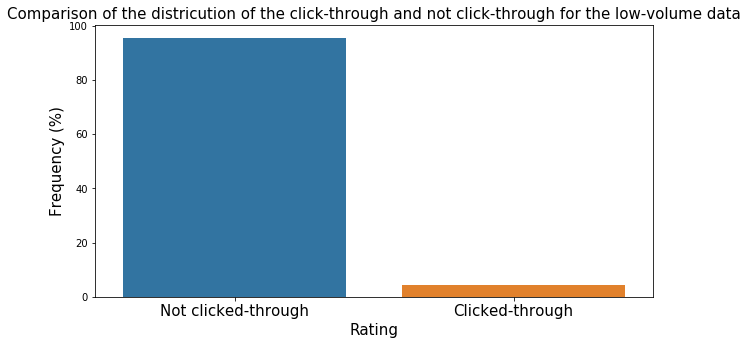

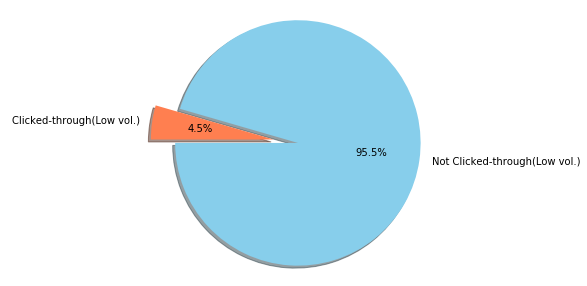

In [114]:
#EDA with the low volume data:

low_rate=low_df_train['rating'].value_counts(normalize=True)

#Visually:
plt.figure(figsize=(10,5))
_=sns.barplot(low_rate.index,low_rate.values*100)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frequency (%)',fontsize=15)
plt.xticks([1, 0], ['Clicked-through','Not clicked-through'],fontsize=15)
plt.title('Comparison of the districution of the click-through and not click-through for the low-volume data', fontsize=15)
plt.savefig("13.png")
plt.show()
#Pieplot:

plt.figure(figsize=(10,5))

#labels = rate.index
labels = 'Not Clicked-through(Low vol.)','Clicked-through(Low vol.)'
sizes = low_rate.values
colors = ['skyblue','coral']
explode = (0.0,0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.savefig("14.png")
plt.show()

* So, we can see that the random subset also contains the same proportion of data.

In [43]:
# Random subset of the test data:
#Taking a small subset of the actual test data:

low_df_test=df_test.sample(frac=0.005, random_state=43)
low_df_test.shape

(9598, 12)

In [44]:
#Trainig set for the low vol data:

y_train = low_df_train.rating

features_cols= ['category', 'dayofweek', 'date', 'hour','user_rating_sum','mer_rating_sum','off_rating_sum']
features = low_df_train[features_cols]

#features:
X_train= features

#Test set for the low volume data:

y_test = low_df_test.rating

features_cols= ['category', 'dayofweek', 'date', 'hour','user_rating_sum','mer_rating_sum','off_rating_sum']
features = low_df_test[features_cols]

#features:
X_test= features

In [1]:
#Applying ML model:
#Import libraries:

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

### 7.2 Random Forest:


In [61]:
#Applying Random Forest with class_weight:
#Apply RF to the low-volume training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy', class_weight= 'balanced')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

In [62]:
#Evaluation scores:
#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)

Accuracy_rf=accuracy_score(y_test,y_predict_rf)
precision_rf= precision_score(y_test,y_predict_rf)
recall_rf= recall_score(y_test,y_predict_rf)
f1_rf= f1_score(y_test,y_predict_rf)
print('The accuracy score:' +str(Accuracy_rf))
print('The precision score:' +str(precision_rf))
print('The recall score:' +str(recall_rf))
print('The f1 score:' +str(f1_rf))

[[6236  289]
 [1691 1382]]
The accuracy score:0.7937070222963117
The precision score:0.827049670855775
The recall score:0.4497233973315978
The f1 score:0.5826306913996627


In [63]:
#Cross-validation:

cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.97334143 0.98007725 0.97927857 0.97395759 0.97649294]
Mean cross validation test score: 0.9766295580968464
Mean cross validation train score: 0.9525936178034268
Standard deviation in cv scores: 0.0027156472649576373


          Features  Importance scores
0         category           0.027939
1        dayofweek           0.055392
2             date           0.086848
3             hour           0.109553
4  user_rating_sum           0.112941
5   mer_rating_sum           0.144178
6   off_rating_sum           0.463149


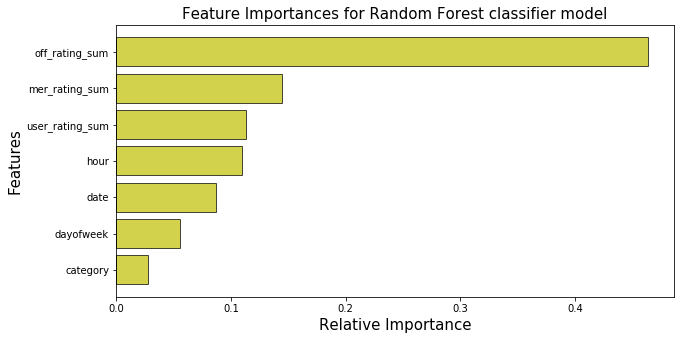

In [102]:
#Feature importance:


features = X_train
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X_train,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6]
_=plt.barh(index,imp,color='y',alpha=0.7,edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("15.png")
plt.show()

### 7.3 Gradient Boost:


In [65]:
#Applying Gradient Boost (class_weight is already taken care of):
#Apply GB to the training data:


gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

In [66]:
#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)

Accuracy_gbc=accuracy_score(y_test, y_predict_gbc)
precision_gbc= precision_score(y_test,y_predict_gbc)
recall_gbc= recall_score(y_test,y_predict_gbc)
f1_gbc= f1_score(y_test,y_predict_gbc)


print('The accuracy score:' +str(Accuracy_gbc))
print('The precision score:' +str(precision_gbc))
print('The recall score:' +str(recall_gbc))
print('The f1 score:' +str(f1_gbc))

[[5991  534]
 [1415 1658]]
The accuracy score:0.7969368618462179
The precision score:0.7563868613138686
The recall score:0.5395379108363163
The f1 score:0.6298195631528964


In [67]:
#Cross-validation:

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.9740585  0.98537582 0.98226957 0.97902392 0.98097271]
Mean cross validation test score: 0.980340104190289
Mean cross validation train score: 0.9605425585761503
Standard deviation in cv scores: 0.003759584076402506


          Features  Importance scores
0         category           0.022096
1        dayofweek           0.081447
2             date           0.085964
3             hour           0.110340
4  user_rating_sum           0.125942
5   mer_rating_sum           0.157678
6   off_rating_sum           0.416531


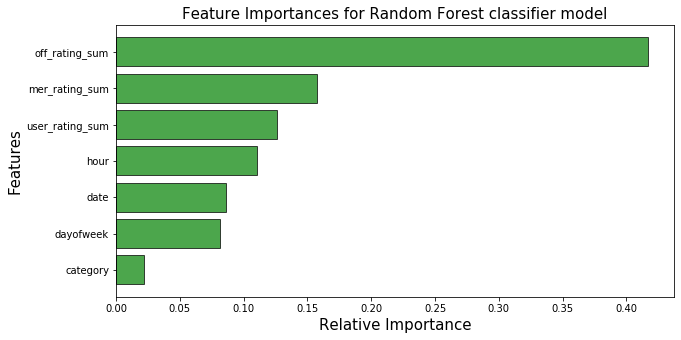

In [103]:
#Feature importance:


features = X_train
importances = list(gbc.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X_train,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6]
_=plt.barh(index,imp,color='g',alpha=0.7,edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("16.png")
plt.show()

### 7.4 Logistic Regression:


In [69]:
#Logistic Regression with class_weight:

from sklearn.linear_model import LogisticRegression

C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l1', C = i,random_state = 40, class_weight='balanced')
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table   

,C_parameter,Accuracy
0,0.001,0.685768
1,0.010,0.651907
2,0.100,0.650031
3,1.000,0.65024
4,10.000,0.65024
5,100.000,0.65024


In [70]:
#Logistic Regression with the best parameters:

Logreg = LogisticRegression(penalty = 'l1', C = 0.001,random_state = 40, class_weight='balanced')
Logreg.fit(X_train,y_train)
# Predict using model
y_predict_lr = Logreg.predict(X_test)

In [71]:
#Confusion matrix:

cnf_matrix= confusion_matrix(y_test,y_predict_lr)
print(cnf_matrix)

Accuracy_lr=accuracy_score(y_test,y_predict_lr)
precision_lr= precision_score(y_test,y_predict_lr)
recall_lr= recall_score(y_test,y_predict_lr)
f1_lr= f1_score(y_test,y_predict_lr)


print('The accuracy score:' +str(Accuracy_lr))
print('The precision score:' +str(precision_lr))
print('The recall score:' +str(recall_lr))
print('The f1 score:' +str(f1_lr))

[[5912  613]
 [2403  670]]
The accuracy score:0.6857678683058971
The precision score:0.5222135619641465
The recall score:0.21802798568174422
The f1 score:0.3076216712580349


In [72]:
#Cross-validation:

cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.73810423 0.71309037 0.72999782 0.73271931 0.73516293]
Mean cross validation test score: 0.7298149297745926
Mean cross validation train score: 0.6652303185097646
Standard deviation in cv scores: 0.008780586073910218


### 7.5 Comparison of the model performances:

* Here we have compared all the metrics for the three algorithms.
* Clearly, RF and GB are performing best.
* So, I would try to tune the hyperparameters for these two best working models.

In [105]:
myLabels = [ 'Logistic Regression','Random Forest','Gradient Boost']

score_test= [ cv_scores_lr_test,cv_scores_rf_test,cv_scores_gbc_test]
score_train= [ cv_scores_lr_train,cv_scores_rf_train,cv_scores_gbc_train]
Accuracy_score = [Accuracy_lr,Accuracy_rf,Accuracy_gbc]
precision_score = [precision_lr,precision_rf,precision_gbc]
recall_score = [recall_lr,recall_rf,recall_gbc]
f1_score = [f1_lr,f1_rf,f1_gbc]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab_prec = pd.DataFrame(list(zip(myLabels, precision_score)), 
               columns =['Algorithm', 'Model precision score']) 

score_tab_recall = pd.DataFrame(list(zip(myLabels, recall_score)), 
               columns =['Algorithm', 'Model recall score']) 

score_tab_f1 = pd.DataFrame(list(zip(myLabels, f1_score)), 
               columns =['Algorithm', 'Model f1 score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)
print('---------------------------------------------')
print(score_tab_prec)
print('---------------------------------------------')
print(score_tab_recall)
print('---------------------------------------------')
print(score_tab_f1)
print('----------------------------------------------------------------')
print(score_tab)

             Algorithm  Model accuracy score
0  Logistic Regression              0.685768
1        Random Forest              0.793707
2       Gradient Boost              0.796937
---------------------------------------------
             Algorithm  Model precision score
0  Logistic Regression               0.522214
1        Random Forest               0.819697
2       Gradient Boost               0.756387
---------------------------------------------
             Algorithm  Model recall score
0  Logistic Regression            0.218028
1        Random Forest            0.528148
2       Gradient Boost            0.539538
---------------------------------------------
             Algorithm  Model f1 score
0  Logistic Regression        0.307622
1        Random Forest        0.642391
2       Gradient Boost        0.629820
----------------------------------------------------------------
             Algorithm  ROC-AUC train score  ROC-AUC test score
0  Logistic Regression             0.6652

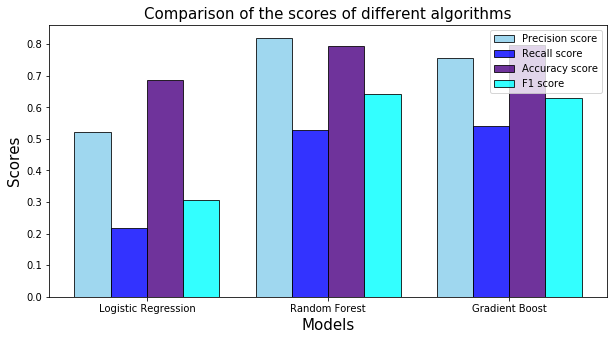

In [106]:
#plotting the scores:

plt.figure(figsize=(10,5))

index=[1,2,3]
index_rec=[1.2,2.2,3.2]
index_acc=[1.4,2.4,3.4]
index_f1=[1.6,2.6,3.6]

#index=myLabels
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Scores',fontsize=15)
plt.title('Comparison of the scores of different algorithms',fontsize=15)
_=plt.bar(index,precision_score,color='skyblue',alpha=0.8,label='Precision score',edgecolor='k',width=0.2)
_=plt.bar(index_rec,recall_score,color='b',alpha=0.8,label='Recall score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,Accuracy_score,color='indigo',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.2)
_=plt.bar(index_f1,f1_score,color='cyan',alpha=0.8,label='F1 score',edgecolor='k',width=0.2)
plt.xticks([1.3, 2.3,3.3], myLabels)
plt.legend()
plt.savefig("17.png")
plt.show()

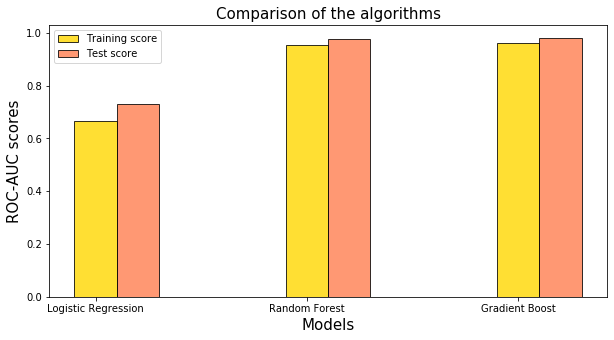

In [107]:
#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3]
index_acc=[1.2,2.2,3.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='gold',alpha=0.8,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='coral',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3], myLabels)
plt.legend()
plt.savefig("18.png")
plt.show()

### 7.6 Hyperparameter Tunning for Random Forest:

In [70]:
#Hyperparameter tuning for Random Forest (with the low volume data):


from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1, class_weight= 'balanced')

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
0.9709179036655559


### 7.7 Hyperparameter Tunning for Gradient Boost:

In [71]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.4min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.9712965767949107


### 7.8 RF model with tunned parameters:

* Fitted the data (low-volume, representative data) again with the tunned parameters for RF.
* Clearly, the scores improved.
* The final prediction table has been saved in the name **'final_result_rf.csv'**. This file has four columns. User-ID, Offer-ID, Merchant-ID, and the Rating. 
* Plotted the ROC curve.
* The ROC-AUC score for the final RF (Tunned) model is: 0.9008744808634841

In [86]:
#Fit the low volume data in RF model  with the tunned parameters:

rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)

#Confusion Matrix:
cnf_matrix= confusion_matrix(y_test,y_predict_rf)
print(cnf_matrix)


#Scores:
acc_rf = accuracy_score(y_test, y_predictions_rf)
precision_rf = precision_score(y_test, y_predictions_rf)
recall_rf = recall_score(y_test, y_predictions_rf)
f1_rf = f1_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()

print('The accuracy score:' +str(acc_rf))
print('The precision score:' +str(precision_rf))
print('The recall score:' +str(recall_rf))
print('The f1 score:' +str(f1_rf))
print('cross validation score:' +str(cv))

[[6236  289]
 [1691 1382]]
The accuracy score:0.8117316107522401
The precision score:0.8196969696969697
The recall score:0.5281483891962252
The f1 score:0.6423906590144468
cross validation score:0.9783574784920802


In [87]:
#Final prediction RF:

target = pd.Series(y_predictions_rf, name='rating')

user_id = low_df_train['userid']
offer_id= low_df_train['offerid']
merchant_id = low_df_train['merchant']

output = pd.DataFrame(list(zip(user_id, offer_id, merchant_id, target)), 
                      columns =['userid','offerid', 'merchant','rating']) 




output.to_csv('final_result_rf.csv', index=False, header=True)

ROC-AUC Score: 0.9008744808634841


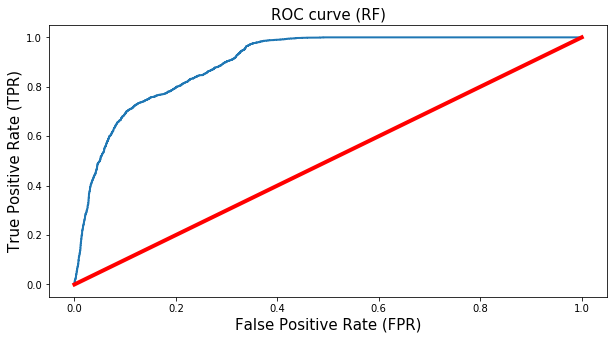

In [108]:
#ROC curve and AUC for test set:

from sklearn.metrics import auc, roc_curve, roc_auc_score

y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
   # plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("19.png")
plt.show()

### 7.9 GB model with the tunned parameters:
* Fitted the data (low-volume, representative data) again with the tunned parameters for GB.
* Clearly, the scores improved.
* The final prediction table has been saved in the name **'final_result_GB.csv'**. This file has four columns. User-ID, Offer-ID, Merchant-ID, and the Rating. 
* Plotted the ROC curve.
* The ROC-AUC score for the final RF (Tunned) model is: 0.9181525410415521

In [89]:
#Fit the low volume data in GB model  with the tunned parameters:

GB= GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)

#Confusion  Matrix:
cnf_matrix = confusion_matrix(y_test, y_predictions_GB)
print(cnf_matrix)

#Metrics:
acc_GB = accuracy_score(y_test, y_predictions_GB)
precision_GB= precision_score(y_test,y_predictions_GB)
recall_GB= recall_score(y_test,y_predictions_GB)
f1_GB= f1_score(y_test,y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()

print('The accuracy score:' +str(acc_GB))
print('The precision score:' +str(precision_GB))
print('The recall score:' +str(recall_GB))
print('The f1 score:' +str(f1_GB))
print('cross validation score:' +str(cv_GB))

[[6175  350]
 [1488 1585]]
The accuracy score:0.8085017712023338
The precision score:0.8191214470284238
The recall score:0.5157826228441262
The f1 score:0.6329872204472844
cross validation score:0.9768690591124661


In [90]:
#Final prediction GB:

target = pd.Series(y_predictions_GB, name='rating')

user_id = low_df_train['userid']
offer_id= low_df_train['offerid']
merchant_id = low_df_train['merchant']

output = pd.DataFrame(list(zip(user_id, offer_id, merchant_id, target)), 
                      columns =['userid','offerid', 'merchant','rating']) 




output.to_csv('final_result_GB.csv', index=False, header=True)

ROC-AUC Score for GB: 0.9181525410415521


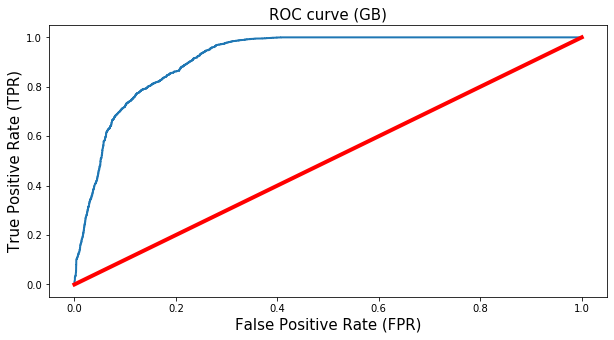

In [109]:
#ROC curve and AUC for test set:

from sklearn.metrics import auc, roc_curve, roc_auc_score

y_scores_GB = GB.predict_proba(X_test)
y_scores_GB = y_scores_GB[:,1]
auroc_GB = roc_auc_score(y_test, y_scores_GB)
print("ROC-AUC Score for GB:", auroc_GB)



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_GB)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
   # plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
_=plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("20.png")
plt.show()

### 8. Conclusions:


* The original dataset is enormous. (15844717 rows are there for the train set). Given my limited computational facility and time, it is almost impossible to deal with the Big-data. So, I have decided to take a random subset of it. This low-volume data would be easier to handle and representative of the population.

* The 'country-code' feature has nothing to do with the analysis as the entire data belongs to only one country. So, I dropped the column.

* The original, hence the low-volume data suffers from a significant class-imbalance problem. Though there are many ways to deal with it,  I have decided to use the 'class_weight' parameter in the sklearn for RF and the LR. The GB already takes care of the class imbalance problem.

* To predict the ratings (probable clicks by the user), here I have considered a bunch of (7) features, either directly from the dataset or engineered/derived from the data. Interestingly, engineered features are the most important ones in terms of relative importance.

* This is a **Classification** problem. Here we have used the following classification models:
  * Logistic Regression
  * Random Forest
  * Gradient Boost

* Evaluating the performance of a model by training and testing on the same dataset can lead to overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train, validation) set. In order to overcome that, the **Cross-Validation** procedure is used where, under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data, and the model is validated on the remaining part.

* We have evaluated each model in terms of model accuracy score, precision, recall, f1, and the 'ROC-AUC' score for both the training and test data, and plotted them. The two best performing models are the Random forest and the Gradient boost. Both are the ensemble model based on decision trees.

* Next, we have carried out the grid search CV for the hyperparameter tuning for both the models separately. This step was the most time consuming one in terms of computation. With the result of the optimized hyperparameters, we have again fitted the two models and got the predictions separately.

* We have evaluated the ROC-AUC scores with the optimized hyperparameters. The model performance improved with the optimized parameters. The final ROC-AUC scores fro both RF and the GB are 0.901 and 0.918

* The final prediction tables (Two columns: **User-ID**, **Offer-ID'**, **'Merchant-ID** and **Rating**) are saved as csv files.

### 9. Future Direction:

There is enough room to improve the model.

* The first target would be to tackle the big-data. Given some resource (cloud computing platform, like AWS), the modeling needs to be done on the full train set.

* To tackle the class-imbalance, other methods (including generating the synthetic set using SMOTE) needs to be tried and rested against each other.

* Here we have used only the data of 14 days. The model can be improved if we can use more data.

* Use ensembles of the machine learning models to average out bias and improve performance.

* I wish there are more features in the data, as the age/sex of the users with different location information, along with some login information. These would have helped the modeling.

* Try to fit and predict using the Extreme Gradient boost, classifier model.